# Survival Analysis in Python With BD Data

Name: Mohammad Taslim Mazumdeer Sohel

Roll: 20231091

Batch: 10th

Section: B

Semister: Final

In [17]:
# Configure Jupyter so figures appear in the notebook

#!pip install utils
#!pip install empyrical_dist

# Configure Jupyter so figures appear in the notebook
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from empyrical_dist import Pmf, Cdf, Surv, Hazard

In [18]:
# from google.colab import files
# uploaded = files.upload()

Read the tables from [National Center for Health Statistics](https://www.cdc.gov/nchs/products/life_tables.htm), specifically [United States Life Tables, 2015. NVSR Volume 67, Number 7. 64pp. (PHS) 2019-1120.](https://www.cdc.gov/nchs/data/nvsr/nvsr67/nvsr67_07-508.pdf)

In [19]:
df = pd.read_csv('child_death_rate_ages_1_4_years.csv')
df.index += 1
df.head()

,Unnamed: 0,qx
1,2010,0.0026
2,2011,0.0024
3,2012,0.0023
4,2013,0.0022
5,2014,0.0020


In [20]:
haz = Hazard(df.qx, name='hazard')
print(haz)


1     0.0026
2     0.0024
3     0.0023
4     0.0022
5     0.0020
6     0.0020
7     0.0018
8     0.0018
9     0.0017
10    0.0017
11    0.0017
12    0.0016
13    0.0018
Name: hazard, dtype: float64


Text(0.5, 1.0, 'Hazard rate, Child Death Rate (Ages 1-4 Years) in BD')

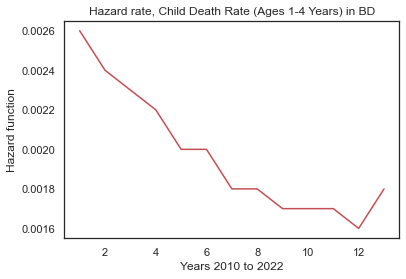

In [21]:
haz.plot(label='', color='C3')
# Decorate the plot with labels and title
import matplotlib.pyplot as plt
plt.xlabel('Years 2010 to 2022')
plt.ylabel('Hazard function')
plt.title('Hazard rate, Child Death Rate (Ages 1-4 Years) in BD')


In [22]:
surv = haz.make_surv(name='survival')
surv.head()

1    0.997400
2    0.995006
3    0.992718
4    0.990534
5    0.988553
Name: survival, dtype: float64

Text(0.5, 1.0, 'Survival function, Child Death Rate (Ages 1-4 Years) in BD')

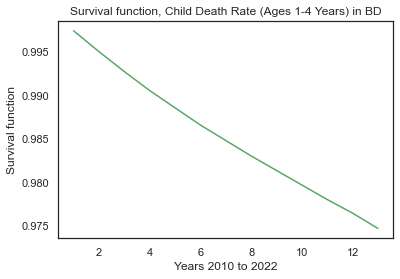

In [23]:
surv.plot()
plt.xlabel('Years 2010 to 2022')
plt.ylabel('Survival function')
plt.title('Survival function, Child Death Rate (Ages 1-4 Years) in BD')


In [24]:
cdf = surv.make_cdf()
cdf[1]

0.0026000000000000467

Text(0.5, 1.0, 'CDF of lifetimes, Child Death Rate (Ages 1-4 Years) in BD')

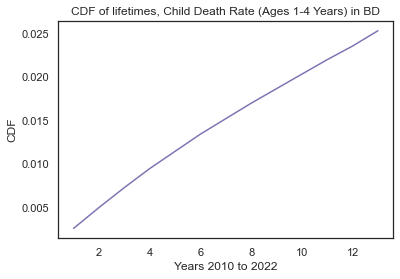

In [25]:
cdf = surv.make_cdf()
cdf.plot(color='C4')
plt.xlabel('Years 2010 to 2022')
plt.ylabel('CDF')
plt.title('CDF of lifetimes, Child Death Rate (Ages 1-4 Years) in BD')

In [26]:
pmf = cdf.make_pmf(name='pmf')
pmf[1], pmf[2]

(0.0026000000000000467, 0.0023937599999999115)

Text(0.5, 1.0, 'PMF of lifetimes, Child Death Rate (Ages 1-4 Years) in BD')

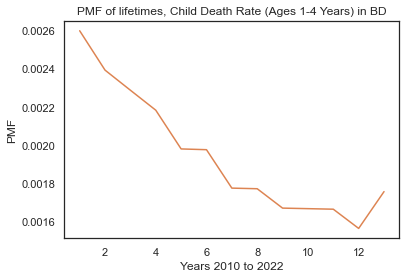

In [27]:
pmf.plot()
plt.xlabel('Years 2010 to 2022')
plt.ylabel('PMF')
plt.title('PMF of lifetimes, Child Death Rate (Ages 1-4 Years) in BD')

In [28]:
pmf.mean()

0.1630395695364586

In [29]:
conditional_pmf = pmf.copy()
#total_expected = pd.Series(index=conditional_pmf.index)
total_expected = pd.Series(index=conditional_pmf.index, dtype=float)

for x in conditional_pmf.qs:
    total_expected[x] = conditional_pmf.mean()
    conditional_pmf[x] = 0
    conditional_pmf.normalize()

Text(0.5, 1.0, 'Life expectancy, Child Death Rate (Ages 1-4 Years) in BD')

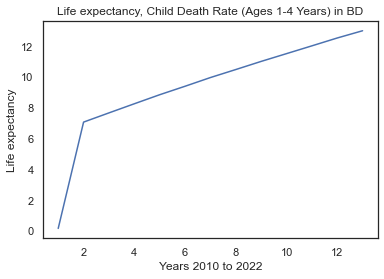

In [30]:
total_expected.plot(label='')
plt.xlabel('Years 2010 to 2022')
plt.ylabel('Life expectancy')
plt.title('Life expectancy, Child Death Rate (Ages 1-4 Years) in BD')

In [31]:
conditional_pmf = pmf.copy()
remaining_expected = pd.Series(index=conditional_pmf.index, dtype=float)

for x in conditional_pmf.qs:
    remaining_expected[x] = conditional_pmf.mean() - x
    conditional_pmf[x] = 0
    conditional_pmf.normalize()

Text(0.5, 1.0, 'Expected remaining lifetime, Child Death Rate (Ages 1-4 Years) in BD')

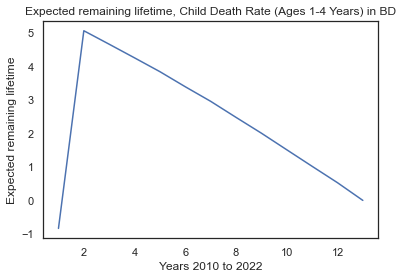

In [32]:
remaining_expected.plot(label='')
plt.xlabel('Years 2010 to 2022')
plt.ylabel('Expected remaining lifetime')
plt.title('Expected remaining lifetime, Child Death Rate (Ages 1-4 Years) in BD')